In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import inspect

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create session object to connect to DB
session = Session(bind=engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
new_date = session.query(func.max(Measurement.date)).scalar()
new_date

'2017-08-23'

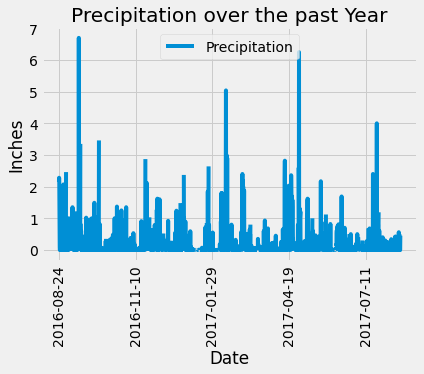

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime.strptime(new_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
year_before = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_before).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=["Date", "Precipitation"])

# Set the index to date and sort the dataframe by date
prcp_df.set_index("Date", inplace=True)
prcp_df = prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90)
plt.title("Precipitation over the past Year")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(prcp_df.describe())

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

station_counts = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

# List the stations and their counts in descending order.

station_counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_counts[0][0]

station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

# Convert tuple to a list to round the avg temp 

station_temps_list = list(station_temps[0])
station_temps_list[2] = round(station_temps_list[2], 2)

# Display results
print(f"These are the Lowest, highest, and Average temps(F) from the most active stations {station_temps_list}")

These are the Lowest, highest, and Average temps(F) from the most active stations [54.0, 85.0, 71.66]


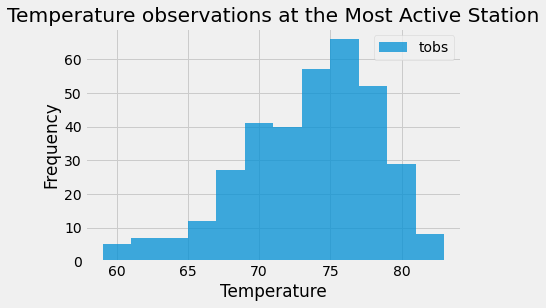

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= year_before).all()

# Create a DataFrame from the query results
station_tobs_df = pd.DataFrame(station_tobs, columns=["tobs"])

# Plot histogram
station_tobs_df.plot.hist(bins=12, alpha=0.75)
plt.title("Temperature observations at the Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [56]:
# Close Session
session.close()